<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.1.1: K-Means by the algorithm

### Australian athletes data set

##### Description
These data were collected in a study of how data on various characteristics of the blood varied with sport, body size, and sex of the athlete.

Usage
data(ais)
Format
A data frame with 202 observations on the following 13 variables.

rcc
red blood cell count, in

wcc
white blood cell count, in per liter

hc
hematocrit, percent

hg
hemaglobin concentration, in g per decaliter

ferr
plasma ferritins, ng

bmi
Body mass index, kg

ssf
sum of skin folds

pcBfat
percent Body fat

lbm
lean body mass, kg

ht
height, cm

wt
weight, kg

sex
a factor with levels f m

sport
a factor with levels B_Ball Field Gym Netball Row Swim T_400m T_Sprnt Tennis W_Polo

Details
Do blood hemoglobin concentrations of athletes in endurance-related events differ from those in power-related events?

Source
These data were the basis for the analyses that are reported in Telford and Cunningham (1991).

References
Telford, R.D. and Cunningham, R.B. 1991. Sex, sport and body-size dependency of hematology in highly trained athletes. Medicine and Science in Sports and Exercise 23: 788-794.

**References**

[Data](http://vincentarelbundock.github.io/Rdatasets/csv/DAAG/ais.csv)

[Data Dictionary](http://vincentarelbundock.github.io/Rdatasets/doc/DAAG/ais.html)

In [1]:
# IMPORT LIBRARIES
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn import datasets
import seaborn as sns
from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('ggplot')


### 1. Import the data

In [2]:
ais = pd.read_csv('../DATA/ais.csv')

In [3]:
ais.head()

Unnamed: 0   rcc  wcc    hc    hg  ferr    bmi    ssf  pcBfat    lbm  \
0           1  3.96  7.5  37.5  12.3    60  20.56  109.1   19.75  63.32   
1           2  4.41  8.3  38.2  12.7    68  20.67  102.8   21.30  58.55   
2           3  4.14  5.0  36.4  11.6    21  21.86  104.6   19.88  55.36   
3           4  4.11  5.3  37.3  12.6    69  21.88  126.4   23.66  57.18   
4           5  4.45  6.8  41.5  14.0    29  18.96   80.3   17.64  53.20   

      ht    wt sex   sport  
0  195.9  78.9   f  B_Ball  
1  189.7  74.4   f  B_Ball  
2  177.8  69.1   f  B_Ball  
3  185.0  74.9   f  B_Ball  
4  184.6  64.6   f  B_Ball

### 2. Do some EDA of relationships between features.

In [5]:
ais.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  202 non-null    int64  
 1   rcc         202 non-null    float64
 2   wcc         202 non-null    float64
 3   hc          202 non-null    float64
 4   hg          202 non-null    float64
 5   ferr        202 non-null    int64  
 6   bmi         202 non-null    float64
 7   ssf         202 non-null    float64
 8   pcBfat      202 non-null    float64
 9   lbm         202 non-null    float64
 10  ht          202 non-null    float64
 11  wt          202 non-null    float64
 12  sex         202 non-null    object 
 13  sport       202 non-null    object 
dtypes: float64(10), int64(2), object(2)
memory usage: 22.2+ KB


In [6]:
ais.isnull().sum()

Unnamed: 0    0
rcc           0
wcc           0
hc            0
hg            0
ferr          0
bmi           0
ssf           0
pcBfat        0
lbm           0
ht            0
wt            0
sex           0
sport         0
dtype: int64

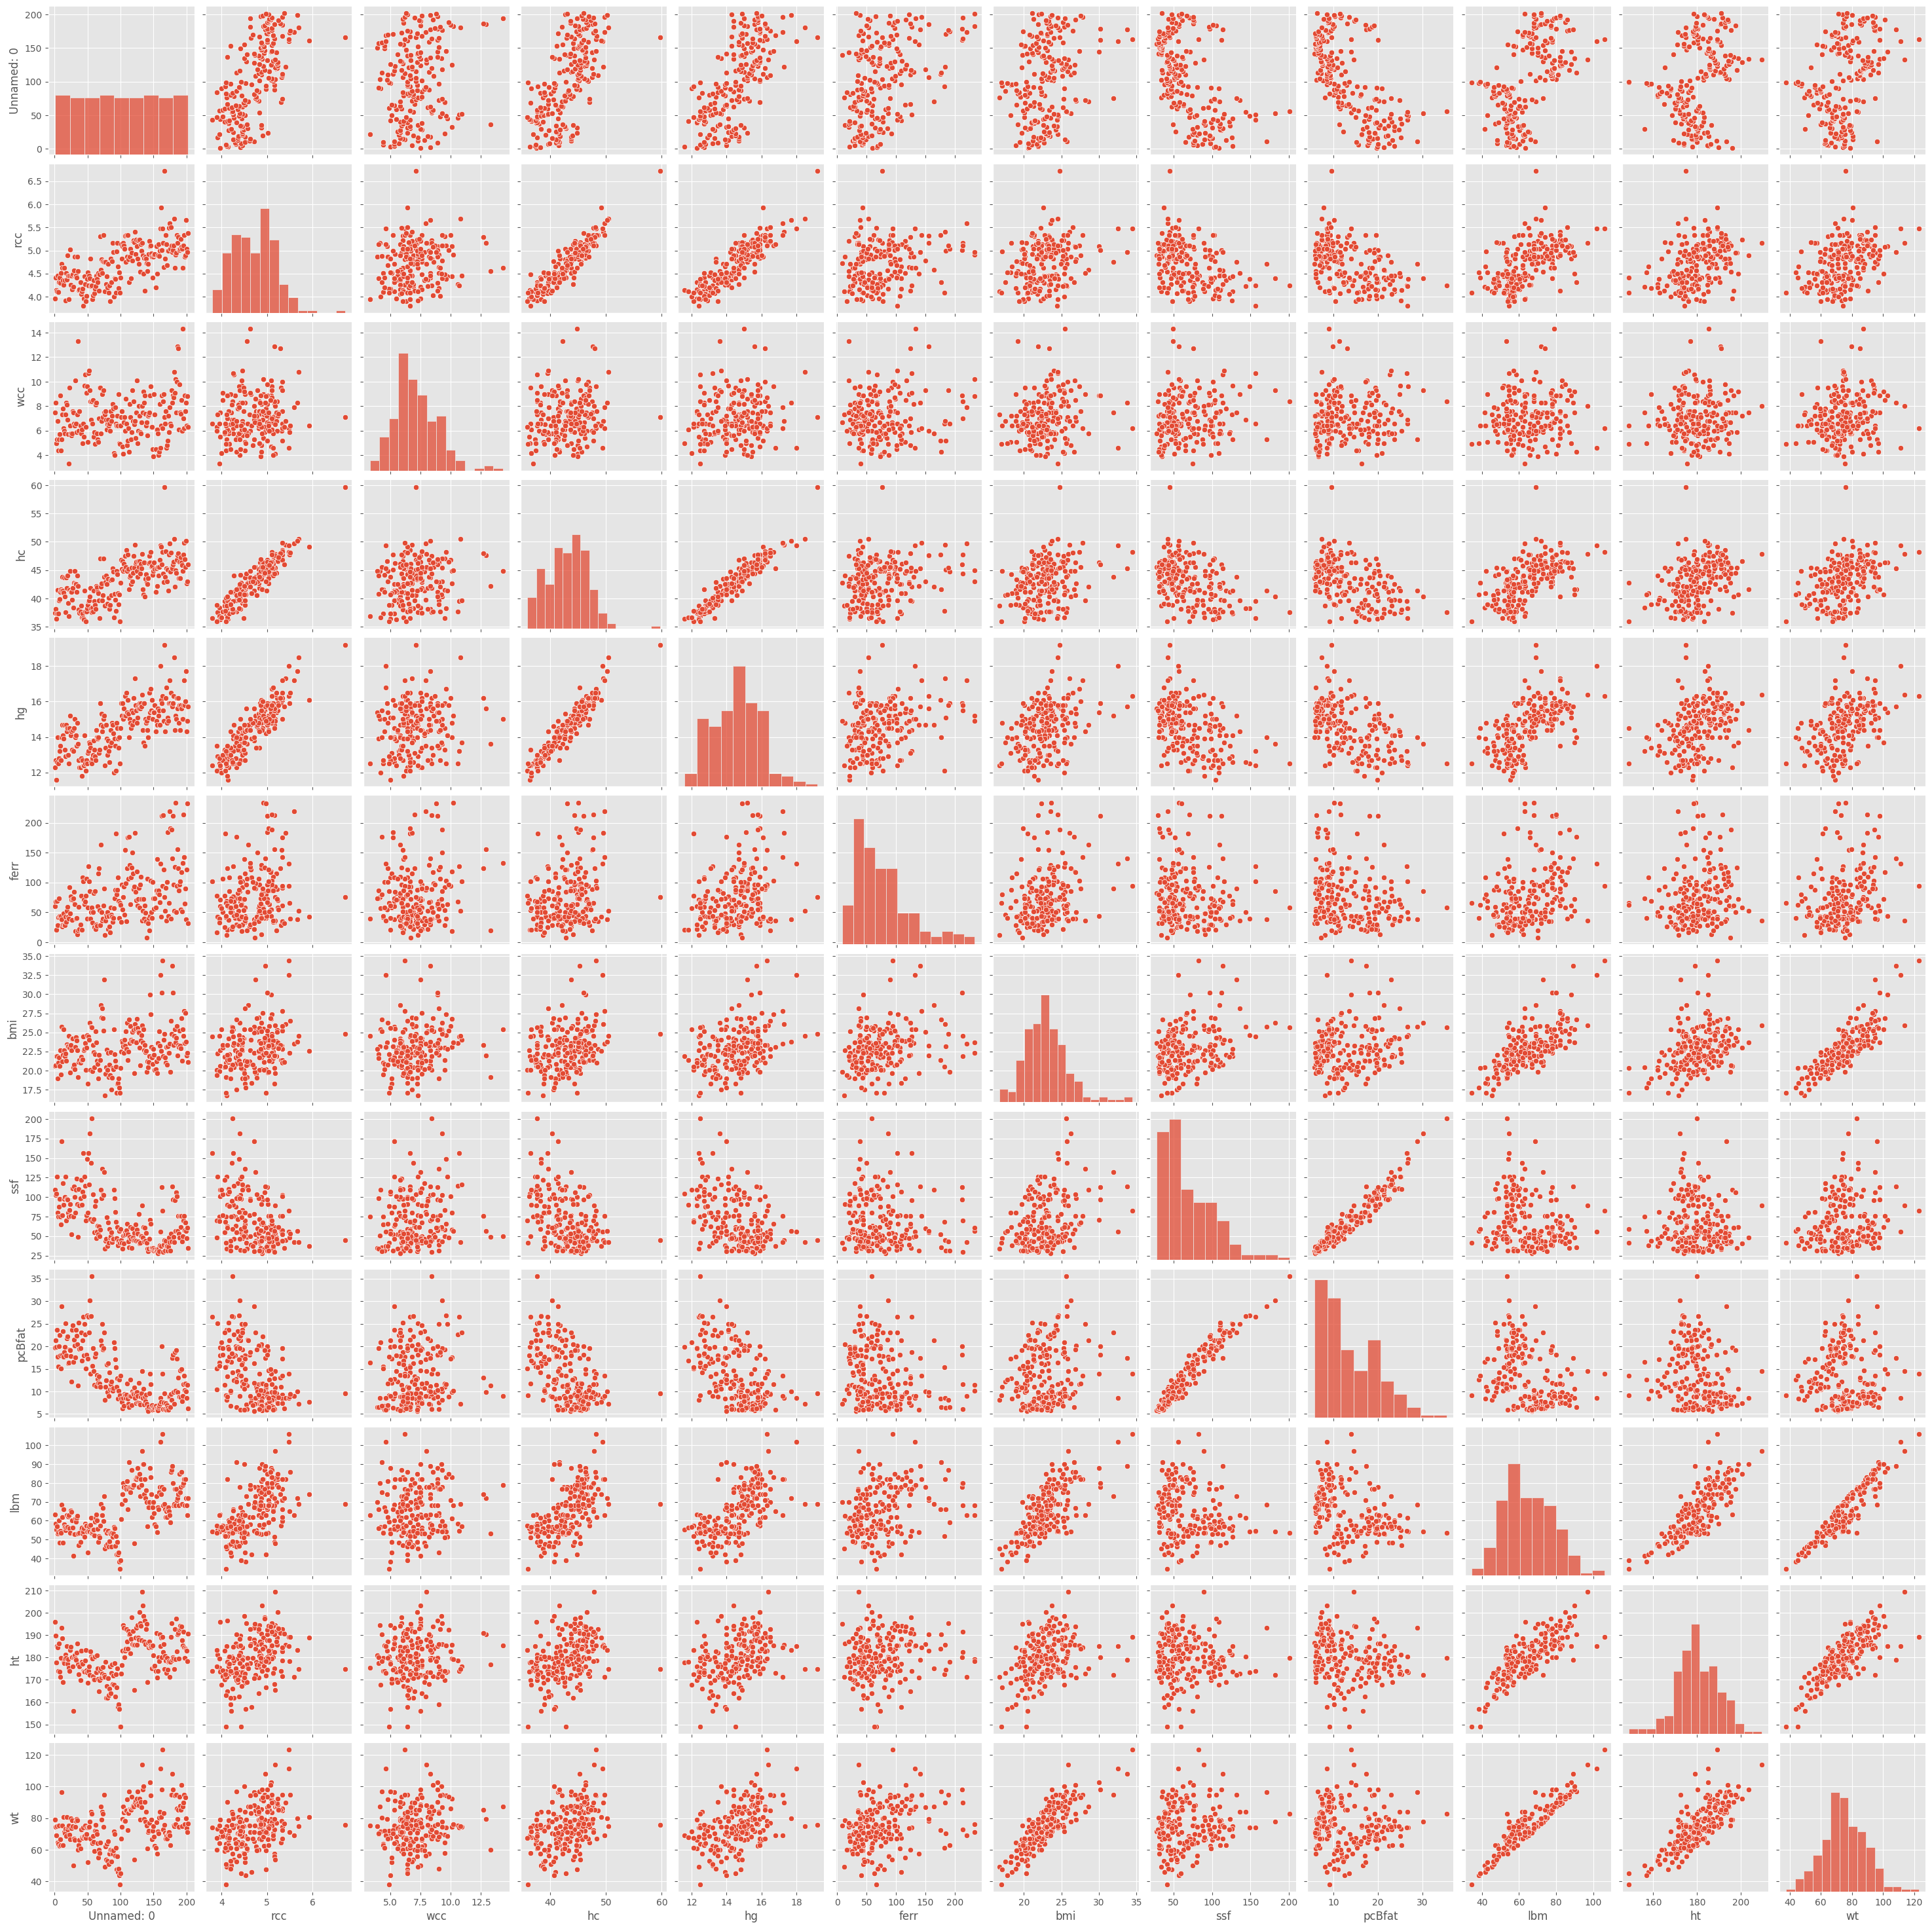

In [4]:
sns.pairplot(ais)

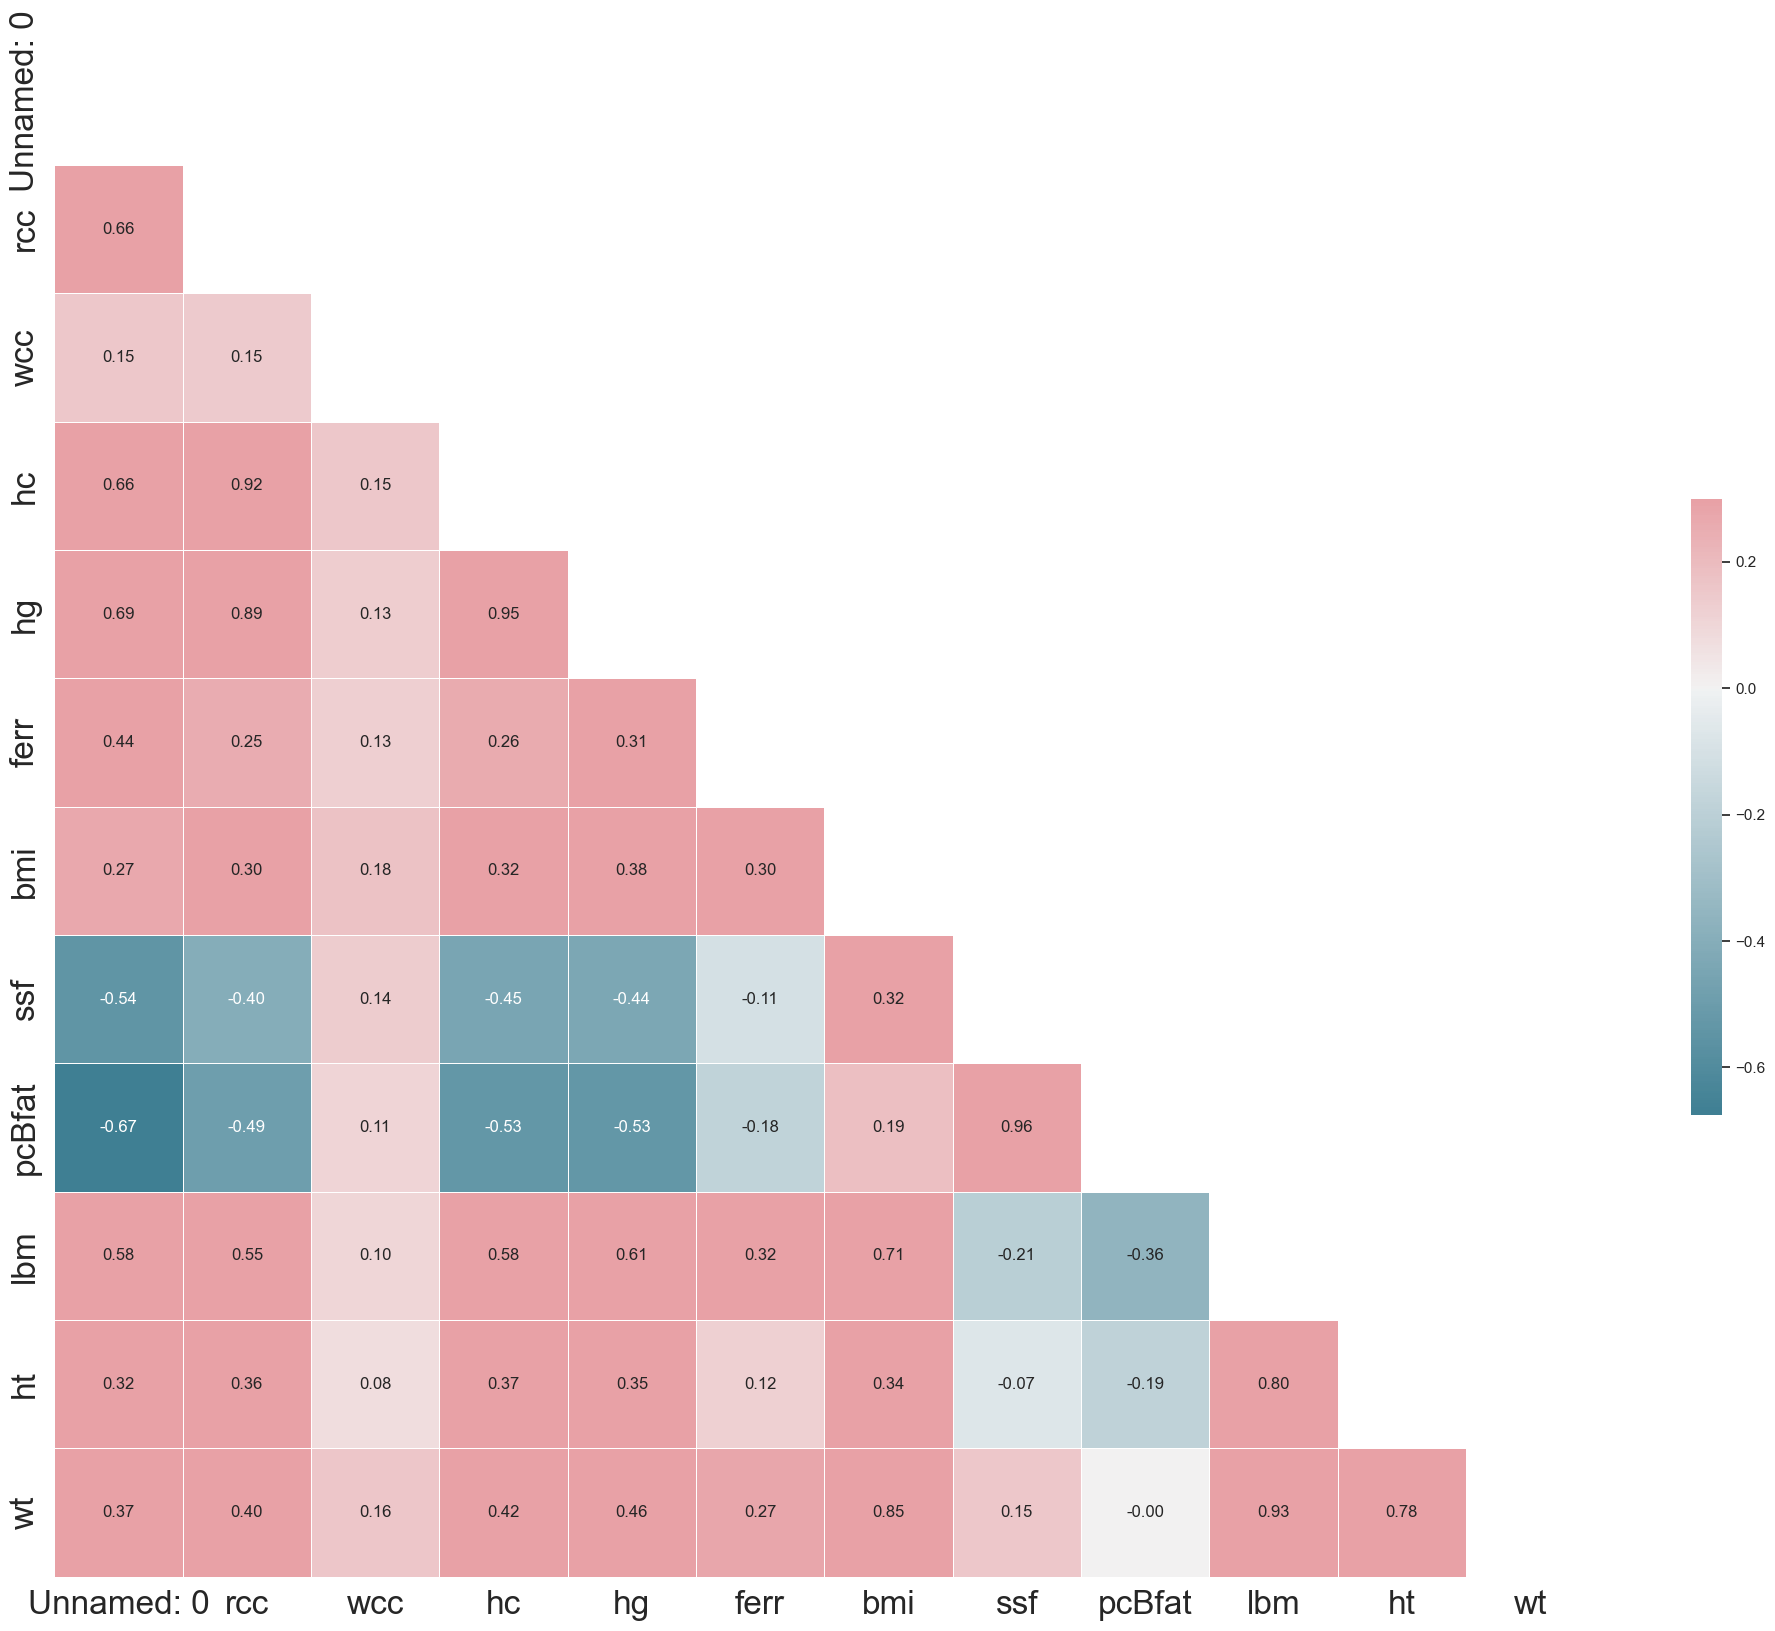

In [19]:
ais_corr =ais.drop(['sex','sport'], axis=1).corr()

 #Copied code from seaborn examples
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(ais_corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)


# Draw the heatmap with the mask and correct aspect ratio
ais_heatmap = sns.heatmap(ais_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .4}, annot=True, fmt='.2f')

ais_heatmap.set_xticklabels(ais_heatmap.get_xmajorticklabels(), fontsize= 24)
ais_heatmap.set_yticklabels(ais_heatmap.get_ymajorticklabels(), fontsize= 24)

plt.show()

In [20]:
ais.describe()

Unnamed: 0         rcc         wcc          hc          hg        ferr  \
count  202.000000  202.000000  202.000000  202.000000  202.000000  202.000000   
mean   101.500000    4.718614    7.108911   43.091584   14.566337   76.876238   
std     58.456537    0.457976    1.800337    3.662989    1.362451   47.501239   
min      1.000000    3.800000    3.300000   35.900000   11.600000    8.000000   
25%     51.250000    4.372500    5.900000   40.600000   13.500000   41.250000   
50%    101.500000    4.755000    6.850000   43.500000   14.700000   65.500000   
75%    151.750000    5.030000    8.275000   45.575000   15.575000   97.000000   
max    202.000000    6.720000   14.300000   59.700000   19.200000  234.000000   

              bmi         ssf      pcBfat         lbm          ht          wt  
count  202.000000  202.000000  202.000000  202.000000  202.000000  202.000000  
mean    22.955891   69.021782   13.507426   64.873713  180.103960   75.007921  
std      2.863933   32.565333    6.189826   13.070197    9.734494   13.925199  
min     16.750000   28.000000    5.630000   34.360000  148.900000   37.800000  
25%     21.082500   43.850000    8.545000   54.667500  174.000000   66.525000  
50%     22.720000   58.600000   11.650000   63.035000  179.700000   74.400000  
75%     24.465000   90.350000   18.080000   74.750000  186.175000   84.125000  
max     34.420000  200.800000   35.520000  106.000000  209.400000  123.200000

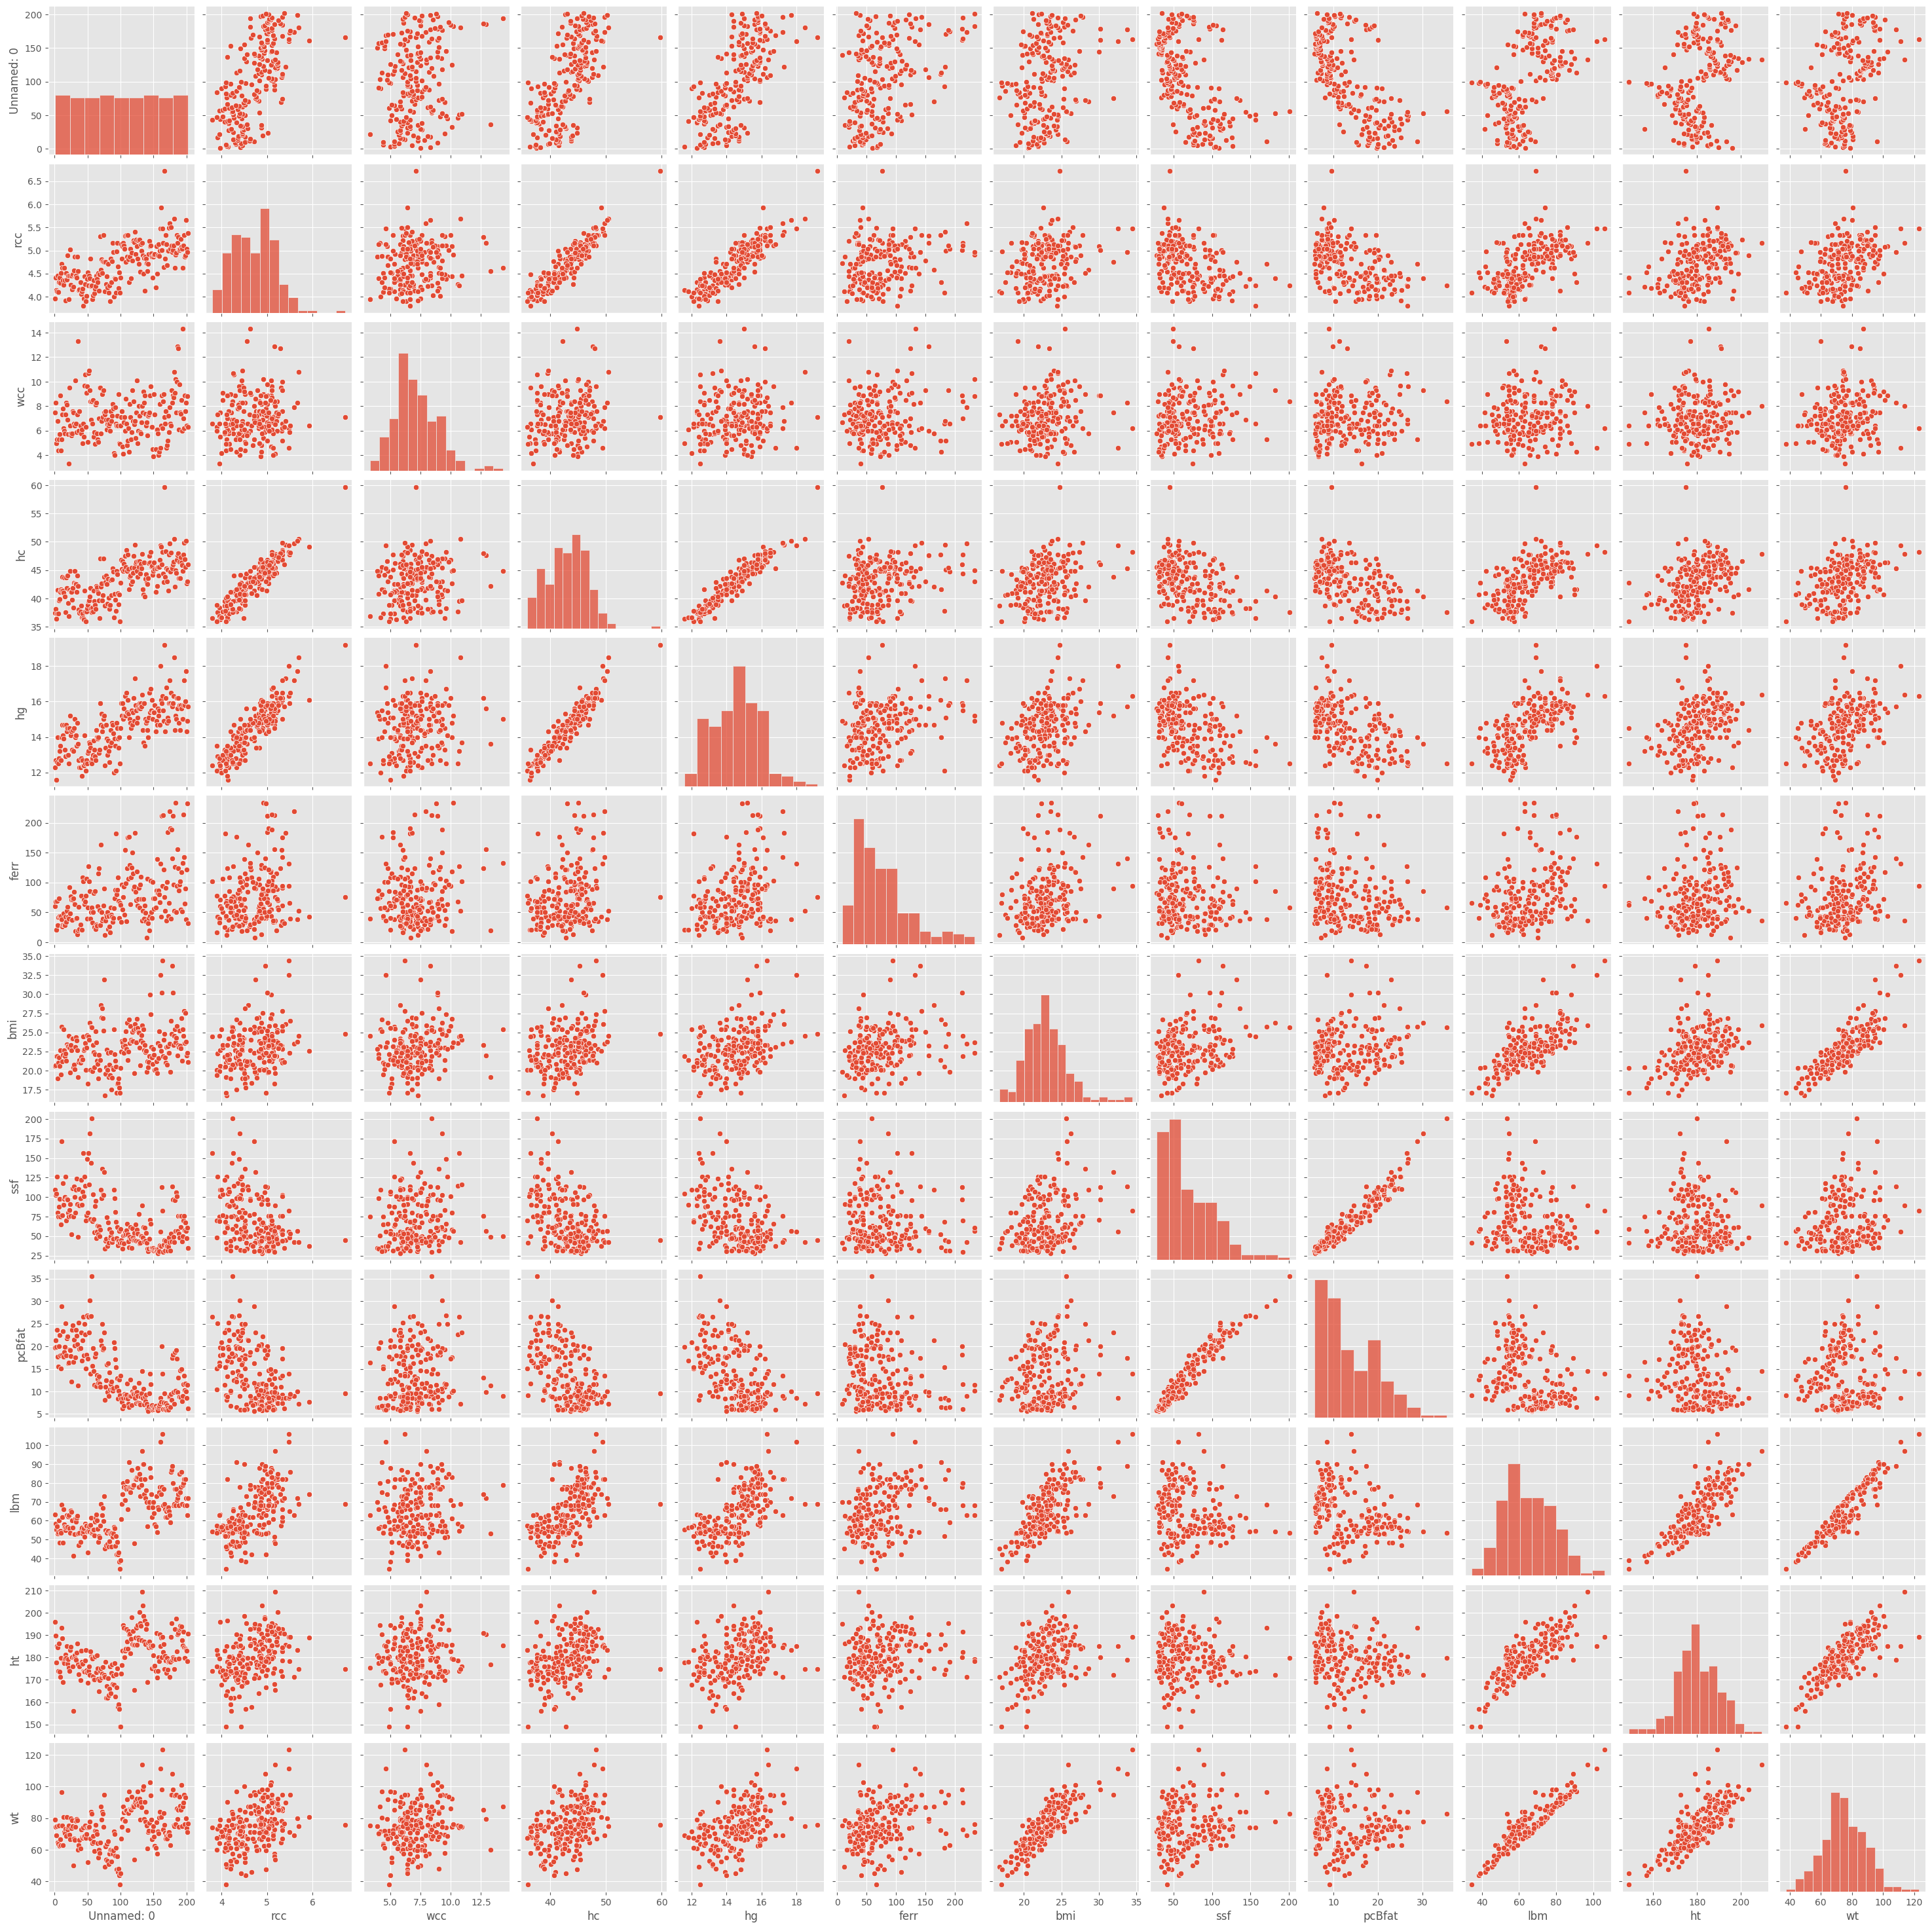

In [8]:
sns.pairplot(ais)

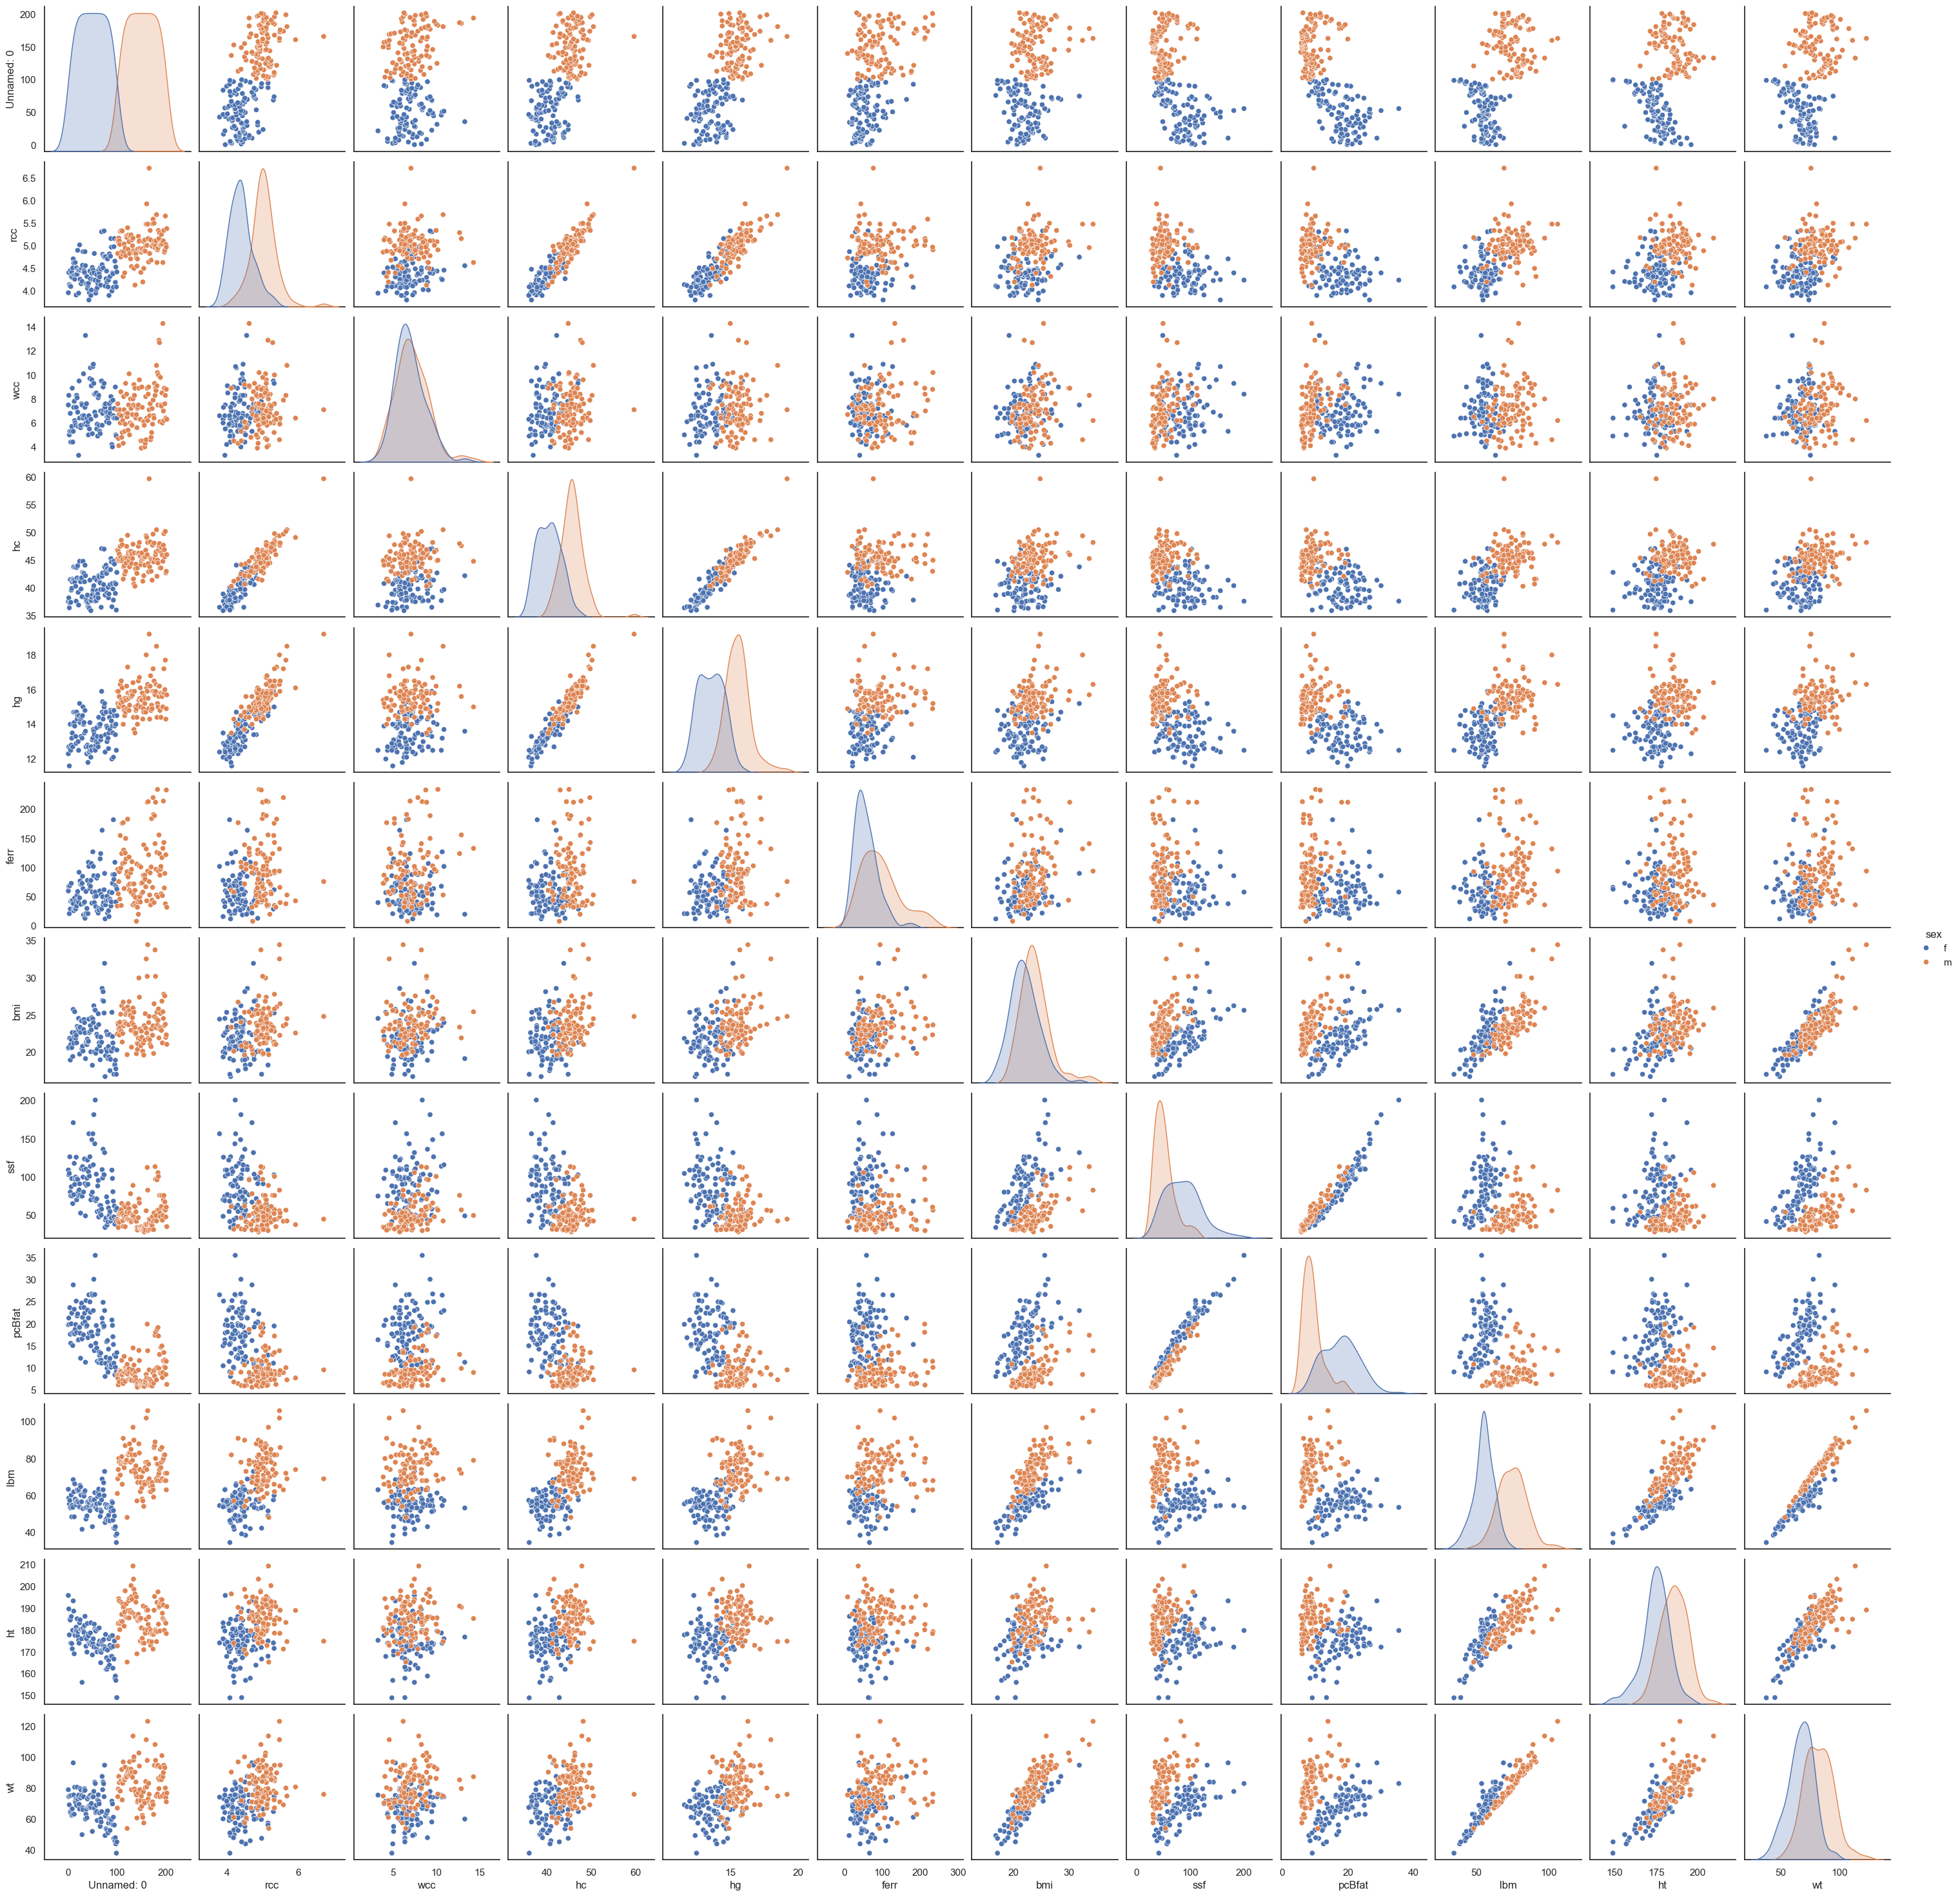

In [21]:
# Look at the sex labels.
sns.pairplot(data=ais, hue='sex')
# classea appear to have a similar number of samples.
# Blue consistently looks like the divisor between the green and red classes.

In [22]:
ais['sex'].value_counts()

sex
m    102
f    100
Name: count, dtype: int64

### 3. Prepare the data for clustering

1. Remove the `sex`, `sport` column. We will see if the clusters from K-Means end up like the actual sex.
2. Put the features on the same scale.

We want to check if the model can separate the male and female properly.

In [23]:
# drop the 'sex' and 'sport'
X = ais.drop(['sex','sport'], axis=1)

# K-mean works with two features?? 
#X = ais[['ht', 'wt']]


In [24]:
# ANSWER
# Scale data before doing anything. 
# This is using StandardScaler()
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

Xss = scaler.fit_transform(X)



In [26]:
Xss[:5]

array([[-1.72349742, -1.66056304,  0.21777075, -1.53030101, -1.6675583 ,
        -0.35616263, -0.83865224,  1.23375957,  1.01102742, -0.11916982,
         1.62671873,  0.2801934 ],
       [-1.70634819, -0.67553837,  0.66323597, -1.33872548, -1.37324045,
        -0.18732754, -0.80014809,  1.03982167,  1.26206048, -0.48502895,
         0.98822602, -0.04376463],
       [-1.68919896, -1.26655317, -1.17430808, -1.83134828, -2.18261453,
        -1.17923368, -0.38360321,  1.0952325 ,  1.03208181, -0.72970203,
        -0.23726805, -0.42531519],
       [-1.67204973, -1.33222148, -1.00725862, -1.58503688, -1.44681991,
        -0.16622316, -0.37660246,  1.76631919,  1.64427855, -0.59010798,
         0.50420735, -0.00776929],
       [-1.65490051, -0.58798062, -0.17201132, -0.43558369, -0.41670745,
        -1.01039859, -1.39871258,  0.34718632,  0.66929855, -0.89537409,
         0.46301428, -0.74927322]])

### 4. Clustering with K-Means

- Cluster the data to our target groups.
    - Use sklearn.cluster.KMeans
- We know that there are 2 actual classes. Let's try using 2, 4. Run the clustering algorithm with each of those k values.

In [27]:
# ANSWER
# Determine the number of k, the number of centre
# In this case, use k=2. 

from sklearn.cluster import KMeans

k=2
k_mean2 =KMeans(n_clusters=k)
k_mean2.fit(Xss)

/Users/140837/miniconda3/envs/iod/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

### 5. Get the labels for the models

In [28]:
# ANSWER
labels_2 = k_mean2.labels_
print(labels_2)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


### 6. Elbow Method For Optimal k

For each k value, we will initialise k-means and use the inertia attribute to identify the sum of squared distances of samples to the nearest cluster centre. As k increases, the sum of squared distance tends to zero.

In [30]:
# ANSWER
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k, n_init='auto')
    km = km.fit(Xss)
    Sum_of_squared_distances.append(km.inertia_)

Below is a plot of sum of squared distances for k in the range specified above. If the plot looks like an arm, then the elbow on the arm is optimal k.

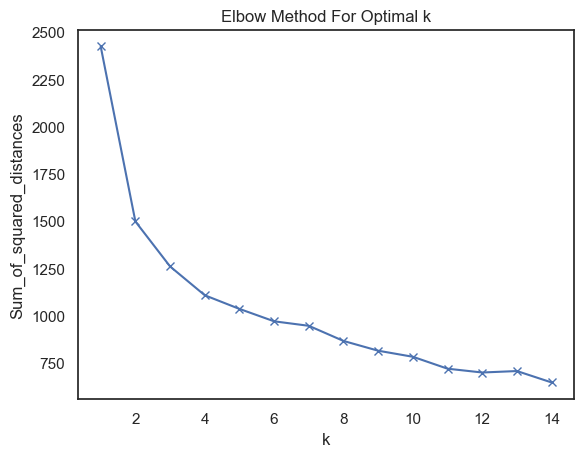

In [31]:
# ANSWER
# Looking at the sharpest turn of the elbow.
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### 7. Plot `wt` vs. `pcBfat` using the clusters from each model.

- Plot wt, pcBfat using hue sex
- Plot wt, pcBfat using hue label

Each time, compare to the actual species classification.

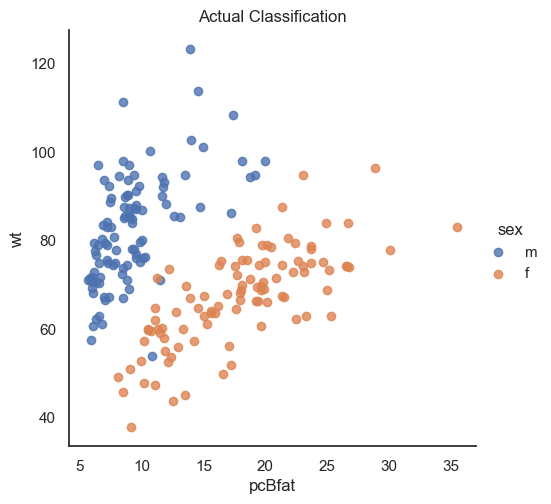

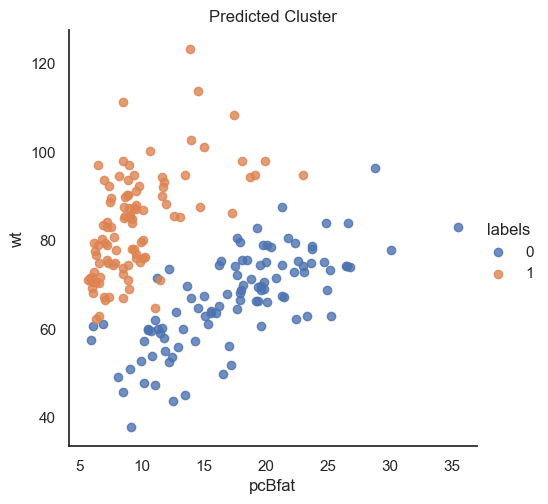

In [32]:
# ANSWER
# Two groups make sense.
#length x groove_length
ais_labels = ais
ais_labels['labels'] = labels_2

sns.lmplot(x='pcBfat', y='wt', data=ais_labels, hue='sex',
           hue_order=['m', 'f'], fit_reg=False)
plt.title('Actual Classification')

sns.lmplot(x='pcBfat', y='wt', data=ais_labels, hue='labels', fit_reg=False)
plt.title('Predicted Cluster')
plt.show();

# What happens when using k=5?

In [36]:
centers

array([[ 21.16842105,  72.9122807 ],
       [  8.09854167,  73.7375    ],
       [ 11.82595238,  56.57142857],
       [ 17.05384615, 102.77692308],
       [  9.87571429,  89.1452381 ]])

In [37]:
kmeans_model.labels_

array([0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 2, 0, 2, 2, 0, 0, 1, 1, 2, 2,
       2, 2, 2, 4, 0, 0, 0, 0, 3, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 4, 4, 1, 1, 4, 4, 4,
       1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4,
       3, 4, 3, 1, 4, 1, 4, 1, 2, 1, 1, 1, 3, 4, 1, 1, 1, 1, 1, 2, 2, 1,
       2, 1, 1, 1, 4, 3, 1, 3, 3, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4,
       4, 3, 3, 1, 1, 3, 1, 3, 4, 1, 4, 1, 4, 4, 4, 3, 1, 4, 4, 4, 1, 4,
       1, 1, 1, 1], dtype=int32)

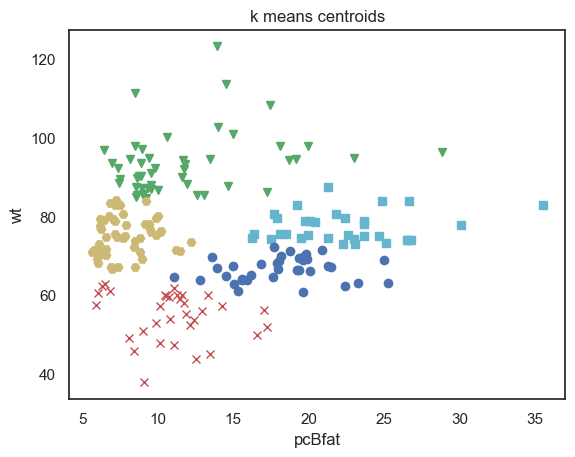

In [42]:
x1 = np.array(ais['pcBfat'])
x2 = np.array(ais['wt'])

# create new plot and data
plt.plot()
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
colors = ['b', 'g', 'c', 'y','r']
markers = ['o', 'v', 's', 'H','x']

# KMeans algorithm
K = 5
kmeans_model = KMeans(n_clusters=K, n_init='auto').fit(X)

#print(kmeans_model.cluster_centers_)
centers = np.array(kmeans_model.cluster_centers_)

plt.plot()
plt.title('k means centroids')
plt.xlabel('pcBfat')
plt.ylabel('wt')

for i, l in enumerate(kmeans_model.labels_):
    #print(i,l)
    plt.plot(x1[i], x2[i], color=colors[l], marker=markers[l],ls='None')

plt.scatter(centers[:,0], centers[:,1], marker="x", color='r')
plt.show()



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



